# Basic Image Operations in TensorFlow and Python

Comparing basic operations in Tensorflow and vanilla Python/Numpy

TensorFlow is GPU enabled, utilizing a NVIDIA Quadro K1000M GPU with 2G memory in Lenovo W530 laptop. The GPU is based on Kepler, with 192 CUDA shader corers, manufactured in TSMC 28nm technology.

Python/Numpy runs on an i7-3720QM CPU

In [2]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
import tensorflow as tf

# Make sure display in webpage
%matplotlib inline
%load_ext autoreload
%autoreload 2

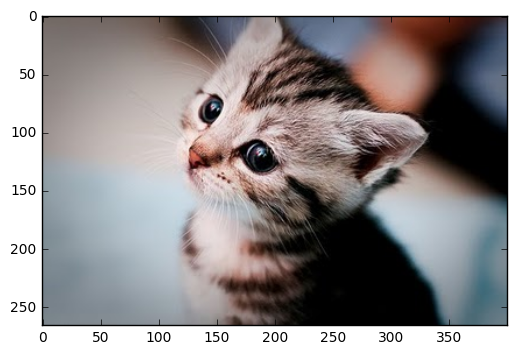

In [3]:
# Load image
img = imread('kitten.jpg')
plt.imshow(img)
plt.show()

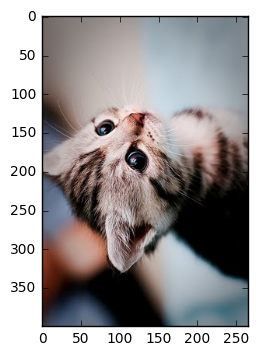

In [5]:
# Rotate image 90 degree counter-clock wise in Numpy
rot_img =  img.transpose((1,0,2))
plt.imshow(rot_img)
plt.show()

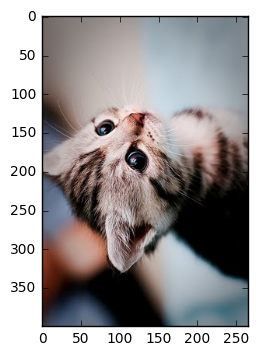

In [7]:
# Rotate image in TensorFlow
# Create a TensorFlow Variable
x = tf.Variable(img, name='x')

model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1, 0, 2])
    session.run(model)
    result = session.run(x)


plt.imshow(result)
plt.show()

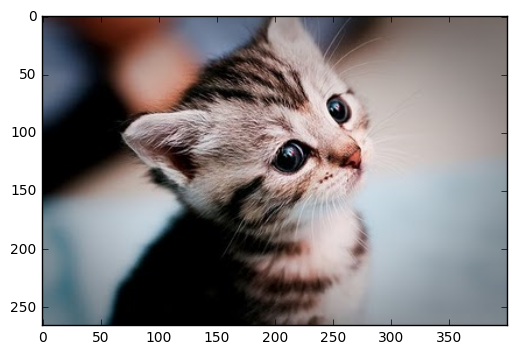

In [8]:
# Flip image in Numpy
flip_img = np.fliplr(img)
plt.imshow(flip_img)
plt.show()

(266, 400, 3)


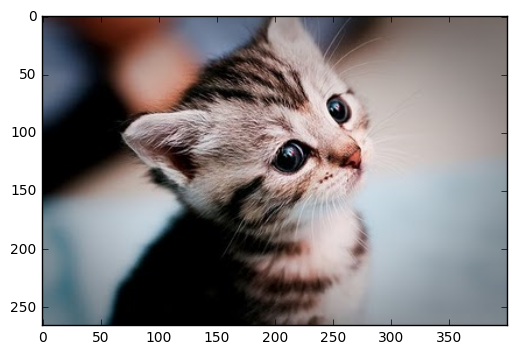

In [11]:
# Flip image in TensorFlow
height, width, depth = img.shape

# Create a TensorFlow Variable
x = tf.Variable(img, name='x')

model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.reverse_sequence(x, [width] * height, 1, batch_dim=0)
    session.run(model)
    result = session.run(x)

print(result.shape)
plt.imshow(result)
plt.show()


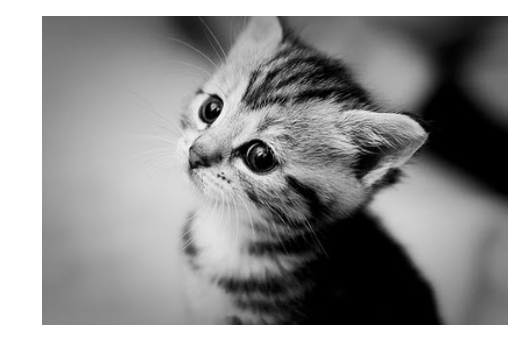

In [25]:
# Converting RGB image to gray scale in Numpy
img_gray = img.dot([0.2989, 0.5870, 0.1140])
plt.axis('off')
plt.imshow(img_gray, cmap='gray')
plt.show()              

(266, 400, 3)
(266, 400)


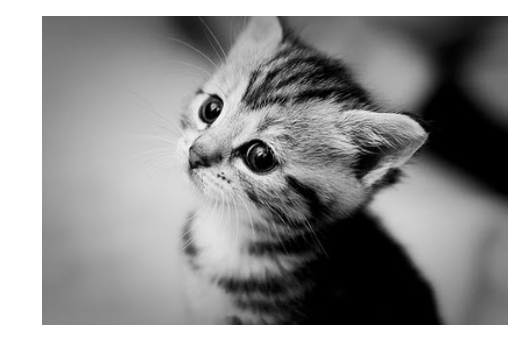

In [23]:
# Converting RGB image to gray scale in TensorFlow
print img.shape
x = tf.placeholder("float", [None, None, None])
gray = 0.2989 * x[:,:, 0] + 0.5870 * x[:,:,1] + 0.1140 * x[:,:,2]

with tf.Session() as session:
    result = session.run(gray, feed_dict={x: img})
    
print(result.shape)
plt.axis('off')
plt.imshow(result, cmap='gray')
plt.show()